# Demographics EDA & Wrangling

This notebook focuses in the exploratory data analysis and wrangling of the patient's demographic features.

**High Level Findings & Accomplishments:** 

+ There are serious data entry errors in some of the variables. These were dropped from the dataset.
+ There are variables that were showing up as non-null, however they were all zeroes or mostly zeroes. These were also dropped from the dataset. 
+ All demographic variables are categorical, with excpetion of age (although there is a limit to how old a person could be). Categorical variables were converted to categorical values and numerical codes were created. 
+ Findings by Variable: 
> +  `Gender`: More hospitalizations are of females. 
> + `Race`: Majority of hospitalizations are of individuals of white and brown races. Racial breakdown seem to closely follows the overall demographics of Brazil.
> + `Ethnicity`: This field is only used if individual's race is indigenous. There seems to be a overwhelming majority of one indigenous ethnicity.
> + `Nationality`: Overwhelming Brazilian. I have dropped this variable since there does not seem to be great variation.
> + `Municipality`: There are ~5,000 municipalities. While big cities comprise the top number of hospitalizations, their totals are still not a significant proportion of the overall dataset. 
> + `Age`: Age is not normally distributed. It has three peaks: in young ages, middle age and late middle age. 
+ Cleaned demographic features were outputted as a CSV.

## Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from matplotlib.pyplot import rcParams
from scipy import stats

**Set Matplot Lib & Seaborn Styles** 

In [2]:
#Set Graphs style

rcParams['figure.figsize'] = 8, 8

sns.set(style='darkgrid')

sns.set_style({"xtick.major.size": 8, "ytick.major.size": 8})

sns.set_context("notebook", font_scale=1.2)

## Upload Random Sampled Data

Upload patient demographic columns from the random sample created from the AIH 2015 - 2018 files.

In [3]:
%%time

AIH_sample_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

AIH_sample_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/Data/Random Sample File/AIH_random_sample_full.csv')

# Patient demographic columns 

pat_charc = ['ANO_CMPT','MES_CMPT','MUNIC_RES',
             'SEXO','IDADE','MORTE','NACIONAL','NUM_FILHOS',
             'INSTRU','GESTRISCO','CBOR','RACA_COR','ETNIA']


pat_charc_data = pd.read_csv(AIH_sample_path2, 
                             encoding = 'UTF-8', 
                             na_values= ['NaN',' ',''],
                             usecols = pat_charc)

Wall time: 1min 16s


In [4]:
pat_charc_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16614830 entries, 0 to 16614829
Data columns (total 13 columns):
ANO_CMPT      16614830 non-null int64
MES_CMPT      16614830 non-null int64
MUNIC_RES     16614830 non-null int64
SEXO          16614830 non-null int64
IDADE         16614830 non-null int64
MORTE         16614830 non-null int64
NACIONAL      16614830 non-null int64
NUM_FILHOS    16614830 non-null int64
INSTRU        16614830 non-null int64
GESTRISCO     16614830 non-null int64
CBOR          16614830 non-null int64
RACA_COR      16614830 non-null int64
ETNIA         16614830 non-null int64
dtypes: int64(13)
memory usage: 1.6 GB


## Demographics Data Bloc Initial Exploration and Wrangling

In [5]:
# See dataframe's first 10 rows

pat_charc_data.head(10)

,ANO_CMPT,MES_CMPT,MUNIC_RES,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
0,2015,8,355030,3,33,0,10,0,0,1,0,3,0
1,2015,8,530010,1,0,0,10,0,0,1,0,99,0
2,2015,10,160030,3,30,0,10,0,0,1,0,3,0
3,2015,3,150080,1,12,0,10,0,0,1,0,3,0
4,2015,12,315750,1,34,0,10,0,0,1,0,3,0
5,2015,8,313630,3,17,0,10,0,0,1,0,99,0
6,2015,7,520110,1,43,0,10,0,0,1,0,3,0
7,2015,12,230250,1,79,0,10,0,0,1,0,1,0
8,2015,11,355370,3,65,0,10,0,0,1,0,1,0
9,2015,1,351510,3,26,0,10,0,0,1,0,3,0


In [7]:
pat_charc_data.describe()

,ANO_CMPT,MES_CMPT,MUNIC_RES,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA
count,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07,1.661483e+07
mean,2.016326e+03,6.101982e+00,3.278468e+05,2.169998e+00,3.976610e+01,4.205598e-02,1.017205e+01,2.248142e-02,2.022218e-02,9.990545e-01,3.053315e+01,2.725429e+01,2.563565e-01
std,1.052621e+00,3.348307e+00,9.434098e+04,9.854444e-01,2.414749e+01,2.007169e-01,3.556184e+00,2.751430e-01,2.306714e-01,3.073511e-02,3.238533e+03,4.250381e+01,6.528947e+00
min,2.015000e+03,1.000000e+00,1.100010e+05,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.015000e+03,3.000000e+00,2.614500e+05,1.000000e+00,2.100000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.016000e+03,6.000000e+00,3.303950e+05,3.000000e+00,3.600000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
75%,2.017000e+03,9.000000e+00,4.101400e+05,3.000000e+00,5.900000e+01,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,9.900000e+01,0.000000e+00
max,2.018000e+03,1.200000e+01,5.301800e+05,3.000000e+00,9.900000e+01,1.000000e+00,3.500000e+02,6.800000e+01,4.000000e+00,1.000000e+00,9.144050e+05,9.900000e+01,2.640000e+02


**Demographics Bloc Descriptive Findings:** 

+ **MUNIC_RES:** Municipality is coded in k's.
+ **NASC:** This is date of birth. 
+ **SEX:** Coded 1 to 3. 
+ **AGE:** Is a number. Min is 0, Max is 99. 99's are likely missing values representation. 
+ **MORTE:** Indicator of death, 0 or 1. 
+ **NACIONAL:** Nationality, coded 1 to 350.
+ **NUM_FILHOS:** Number of children of the patient.  This is a number. Min 0, Max 63 (this is unlikely to be right). 75th pct is 0. 
+ **INSTRU:** Degree of instruction of the patient (i.e. education level). Min 0, Max 4.
+ **GESTRISCO:** Pregnant at risk indicator. Min 0, Max 1
+ **CBOR:** Occupation of the patient. Min 0, Max 848,510.
+ **RACA_COR:** Race of the patient. Min 0, Max 99. 99's are missing values representation.
+ **ETNIA:** Ethnicity of the patient. Used if race is indigenous. Min 0, Max 264.

> **Create Plots of Categorical Variables**

In [8]:
# Create counts by categories

count_muni = pd.DataFrame(pat_charc_data.MUNIC_RES.value_counts()).reset_index()
count_sexo = pd.DataFrame(pat_charc_data.SEXO.value_counts()).reset_index()
count_morte = pd.DataFrame(pat_charc_data.MORTE.value_counts()).reset_index()
count_instru = pd.DataFrame(pat_charc_data.INSTRU.value_counts()).reset_index()
count_naci = pd.DataFrame(pat_charc_data.NACIONAL.value_counts()).reset_index()
count_gest = pd.DataFrame(pat_charc_data.GESTRISCO.value_counts()).reset_index()
count_cbor = pd.DataFrame(pat_charc_data.CBOR.value_counts()).reset_index()
count_raca = pd.DataFrame(pat_charc_data.RACA_COR.value_counts()).reset_index()
count_etnia = pd.DataFrame(pat_charc_data.ETNIA.value_counts()).reset_index()

> **Var:** `Sex of the Patient`

Text(0.5,1,'Sex of the Patient')

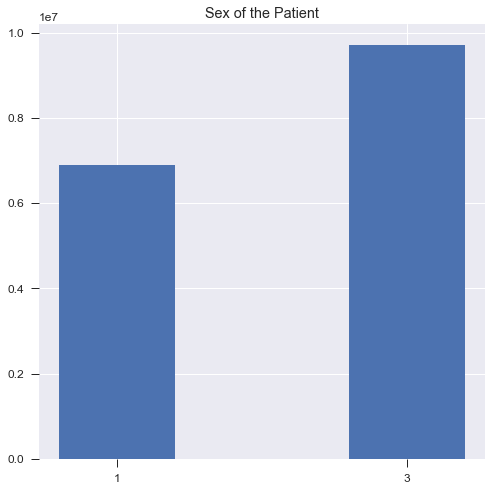

In [9]:
# Sex of the patient 

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_sexo['index'], height = count_sexo.SEXO, tick_label = count_sexo['index'])

plt.title('Sex of the Patient')

Add gender category names to dataframe.

In [6]:
# Create dictionary with categories

sex = {1: 'male', 3: 'female'}

# Map dictionary to a new column

pat_charc_data['sexo_names'] = [sex[item] for item in pat_charc_data.SEXO]

> **Var:** `Death Indicator`

Text(0.5,1,'Death Indicator')

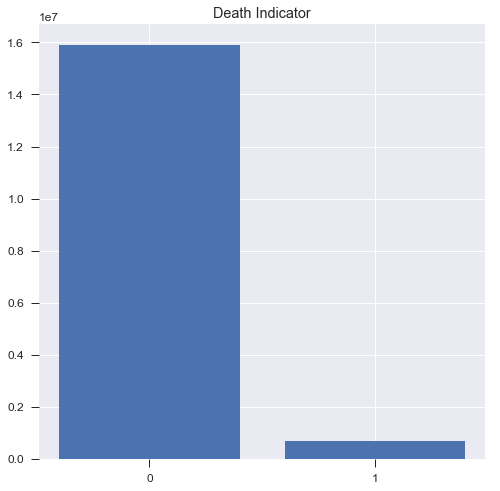

In [11]:
# Death indicator

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_morte['index'], height = count_morte.MORTE, tick_label = count_morte['index'])

plt.title('Death Indicator')

Add death category names to dataframe.

In [7]:
# Create dictionary with categories

death = {0: 'No Death', 1: 'Death'}

# Map dictionary to a new column

pat_charc_data['morte_name'] = [death[item] for item in pat_charc_data.MORTE]

> **Var:** `Instruction Level`

Text(0.5,1,'Instruction Level of the Patient')

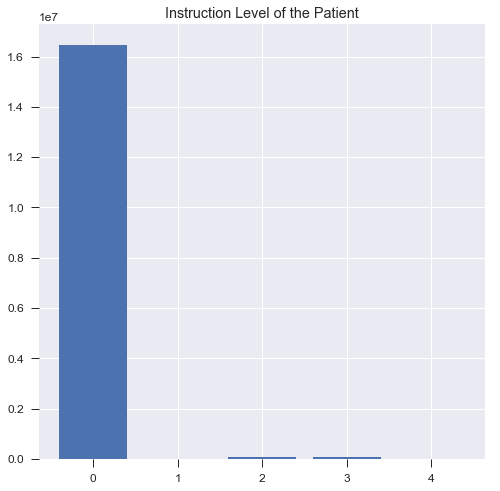

In [13]:
# Instruction Level of the patient (i.e. education level)

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_instru['index'], height = count_instru.INSTRU, tick_label = count_instru['index'])

plt.title('Instruction Level of the Patient')

This variable is be populated mostly by 0's. Which means is mostly empty.

> **Var:** `Pregnancy at Risk`

   index  GESTRISCO
0      1   16599120
1      0      15710


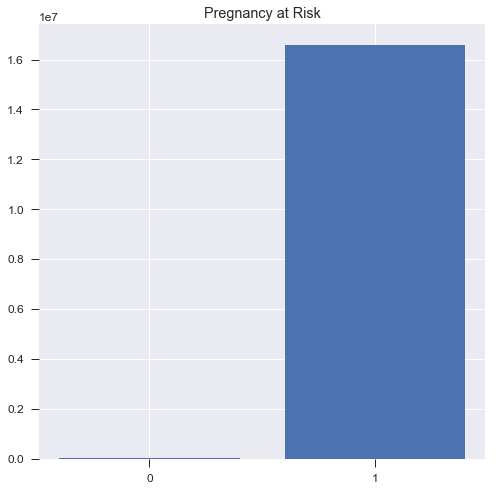

In [14]:
# Pregnancy at risk

sns.set_context("notebook", font_scale=1.2)

plt.bar(x = count_gest['index'], height = count_gest.GESTRISCO, tick_label = count_gest['index'])

plt.title('Pregnancy at Risk')

print(count_gest)

This variable has serious data entry issues. It is not possible to be male and pregnant at risk.

> **Var:** `Municipality of the Patient`

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text xticklabel objects>)

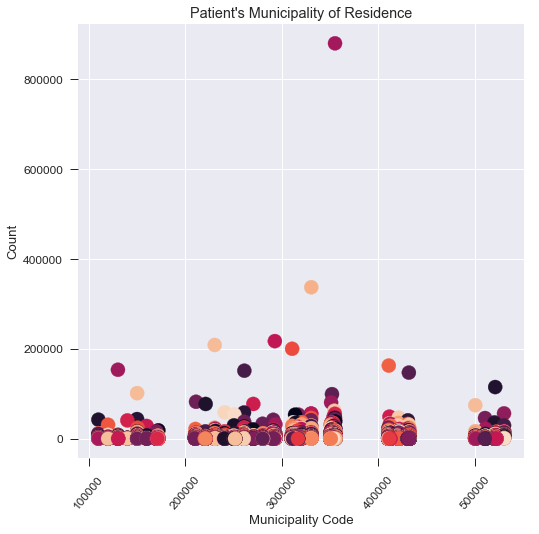

In [15]:
# Plot municipalities of patients

colors = np.random.rand(len(count_muni))

plt.scatter(x = count_muni['index'], y = count_muni['MUNIC_RES'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel('Municipality Code')

plt.title("Patient's Municipality of Residence")

plt.xticks(rotation = 50)

* Add municipality names to the dataframe

In [12]:
%%time

muni_path = ('/Users/ivettetapia 1/Symbolic Link Seagate Drive/Springboard/Capstone 2_Deep_Learning/References/Municipalities.csv')

muni_path2 = ('/Users/itapia/Documents/Springboard/Capstone 2_Deep_Learning/References/Municipalities.csv')


muni_data = pd.read_csv(muni_path2, sep = '\t')

Wall time: 531 ms


In [13]:
#See head of municipality codes

muni_data.head()

,MUNIC_RES,MUNIC_RES_NAME
0,110001,Alta Floresta D'Oeste
1,110037,Alto Alegre dos Parecis
2,110040,Alto Paraíso
3,110034,Alvorada D'Oeste
4,110002,Ariquemes


In [14]:
pat_charc_data = pat_charc_data.merge(muni_data, how = 'left', on = 'MUNIC_RES')

pat_charc_data.head(15)

,ANO_CMPT,MES_CMPT,MUNIC_RES,SEXO,IDADE,MORTE,NACIONAL,NUM_FILHOS,INSTRU,GESTRISCO,CBOR,RACA_COR,ETNIA,sexo_names,morte_name,race_names,MUNIC_RES_NAME
0,2015,8,355030,3,33,0,10,0,0,1,0,3.0,NaN,female,No Death,white,São Paulo
1,2015,8,530010,1,0,0,10,0,0,1,0,NaN,NaN,male,No Death,NaN,Brasília
2,2015,10,160030,3,30,0,10,0,0,1,0,3.0,NaN,female,No Death,white,Macapá
3,2015,3,150080,1,12,0,10,0,0,1,0,3.0,NaN,male,No Death,white,Ananindeua
4,2015,12,315750,1,34,0,10,0,0,1,0,3.0,NaN,male,No Death,white,Santa Efigênia de Minas
5,2015,8,313630,3,17,0,10,0,0,1,0,NaN,NaN,female,No Death,NaN,João Pinheiro
6,2015,7,520110,1,43,0,10,0,0,1,0,3.0,NaN,male,No Death,white,Anápolis
7,2015,12,230250,1,79,0,10,0,0,1,0,1.0,NaN,male,No Death,brown,Brejo Santo
8,2015,11,355370,3,65,0,10,0,0,1,0,1.0,NaN,female,No Death,brown,Taquaritinga
9,2015,1,351510,3,26,0,10,0,0,1,0,3.0,NaN,female,No Death,white,Embu-Guaçu


> **Var:** `Patient's Nationality`

   index  NACIONAL
0     10  16546538
1     55     27263
2     23      5927
3     22      5431
4     45      3145


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text xticklabel objects>)

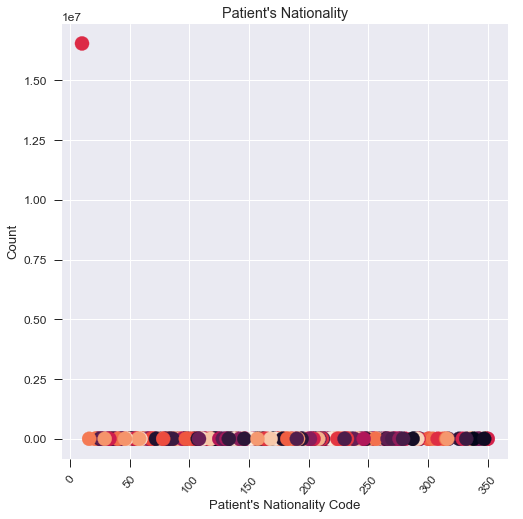

In [20]:
print(count_naci.head(5))

# Plot Top 20 nationalities of patients

colors = np.random.rand(len(count_naci))

plt.scatter(x = count_naci['index'], y = count_naci['NACIONAL'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Nationality Code")

plt.title("Patient's Nationality")

plt.xticks(rotation = 50)

The overwhemling majority of nationality is 10. Which is Brazilian. This makes sense. However, this information is likely not useful information to give to the model since it will not learn much from this information.

> **Var:** `Patient's Occupation`

    index      CBOR
0       0  16613037
1  225125       750
2  515105       239
3  225265       140
4  225133       140


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000.]), <a list of 7 Text xticklabel objects>)

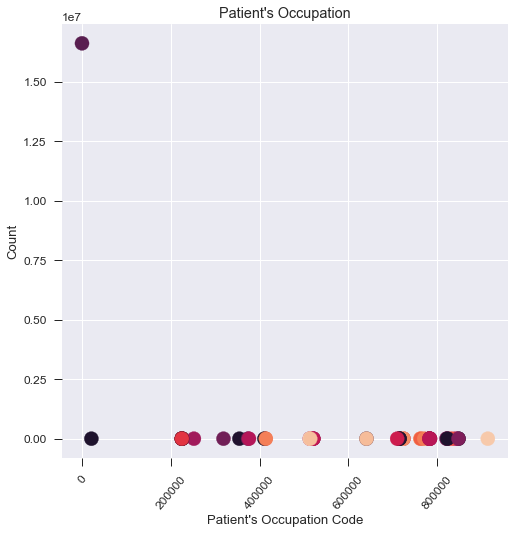

In [21]:
print(count_cbor.head(5))

# Plot occupations of patients

colors = np.random.rand(len(count_cbor))

plt.scatter(x = count_cbor['index'], y = count_cbor['CBOR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Occupation Code")

plt.title("Patient's Occupation")

plt.xticks(rotation = 50)

This is for the most populated by zeros (0). This means that is mostly empty.

> **Var:** `Patient's Race`

   index  RACA_COR
0      3   5900057
1      1   5508799
2     99   4314985
3      2    583117
4      4    272614
5      5     35258


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text xticklabel objects>)

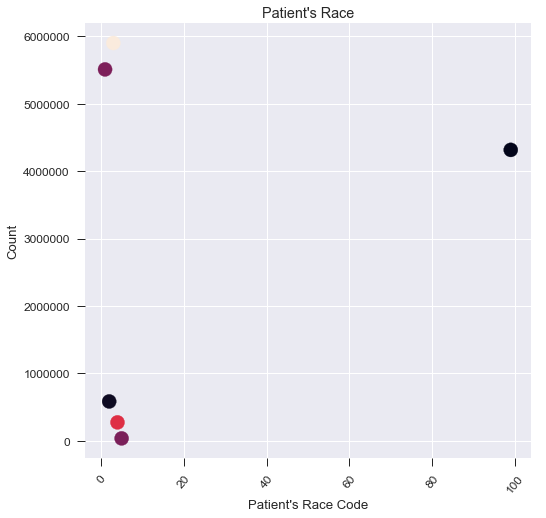

In [22]:
print(count_raca)

# Plot Race of patients

colors = np.random.rand(len(count_raca))

plt.scatter(x = count_raca['index'], y = count_raca['RACA_COR'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Race Code")

plt.title("Patient's Race")

plt.xticks(rotation = 50)

There are 2,203,827 marked as 99 or unknown. This is 26% of the available data.

Add race category names to dataframe.

In [8]:
# Create dictionary with categories

race = {1: 'brown', 2: 'black', 3: 'white', 4:'asian', 5:'indigenous', 99: np.nan}

# Map dictionary to a new column

pat_charc_data['race_names'] = [race[item] for item in pat_charc_data.RACA_COR]

In [9]:
#Replace 99's with np.nan

pat_charc_data['RACA_COR'] = pat_charc_data['RACA_COR'].replace(to_replace = 99, value = np.nan)

> **Var:** `Patient's Ethnicity`

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text xticklabel objects>)

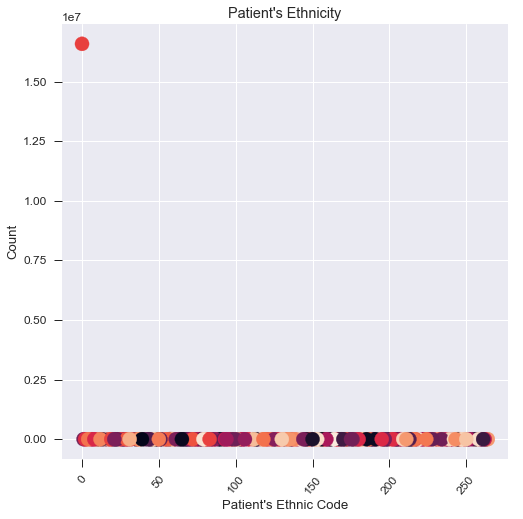

In [25]:
# Plot ethnicities of patients

colors = np.random.rand(len(count_etnia))

plt.scatter(x = count_etnia['index'], y = count_etnia['ETNIA'], 
            s= 200, c = colors)

plt.ylabel('Count')

plt.xlabel("Patient's Ethnic Code")

plt.title("Patient's Ethnicity")

plt.xticks(rotation = 50)

There are many 0's. However, this makes sense because this field is only used if the patient is of an specific race category.

In [10]:
# Replace 0's with np.nan's

pat_charc_data['ETNIA'] = pat_charc_data['ETNIA'].replace(to_replace = 0, value = np.nan)

> **Create plots of Continous Variables**

>> **Vars:** `Patient's Age & Patient's Number of Children`

*Number of Children Greater > 15 & 30 (these are very suspect)*

In [27]:
# Filter by number of children (greater than 15 children). These are suspect entries.

print('Rows with number of children > 15: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] > 15]))

print('Rows with number of children > 30: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] > 30]))

print('Rows with number of children = 0: ', len(pat_charc_data[pat_charc_data['NUM_FILHOS'] == 0]))

Rows with number of children > 15:  45
Rows with number of children > 30:  18
Rows with number of children = 0:  16480217


C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


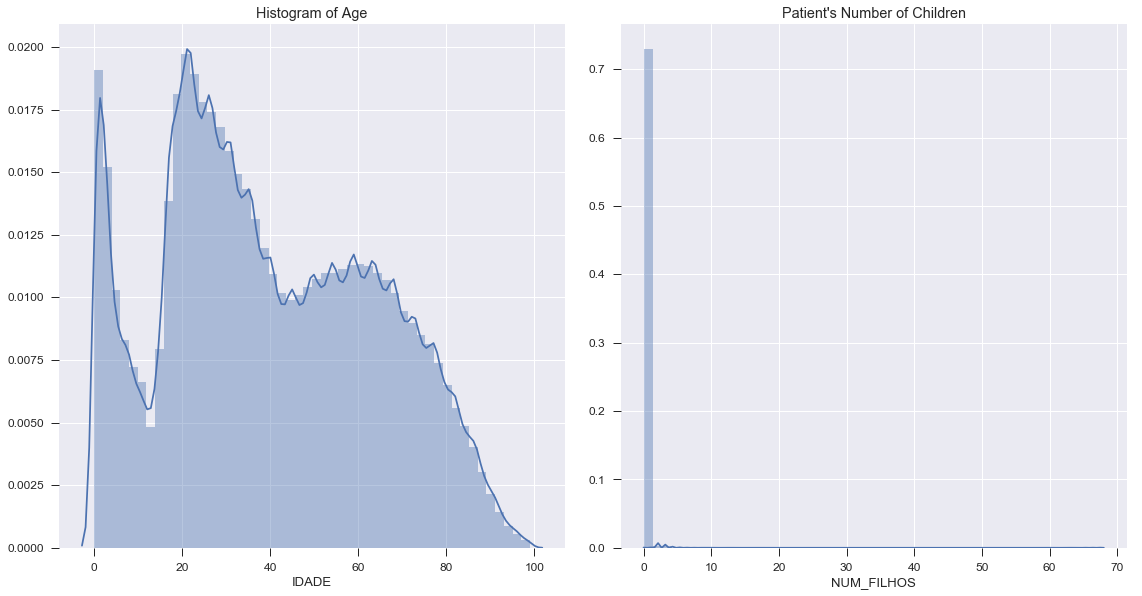

In [28]:
# Plot age variable

plt.subplot(221)

sns.distplot(pat_charc_data.IDADE)

plt.title('Histogram of Age')

# Plot patient's number of children variable

plt.subplot(222)

sns.distplot(pat_charc_data['NUM_FILHOS'].dropna())

plt.title("Patient's Number of Children")

plt.tight_layout(rect=(2, 2, 4, 4))

+ Age has a three peaks.

+ Patients number of children is mostly 0's.

#### Demographic Features Selection

Based on the findings of the initial exploratory data analysis I will use the following demographic features due to the fact that they are fairly complete and there is no reasons to suspect data entry errors. 
    
+ **Municipality of Residence**

+ **Gender**

+ **Age**

+ **Race**

+ **Ethnicity**

+ **Death Indicator**

I will drop the following columns due to either large amounts of missing values or suspicion of serious data entry errors.
    
+ **Pregnancy ar risk**

+ **Instruction Level**

+ **Occupation**

+ **Patient's Number of Children**

+ **Nationality**

> **Recode categorical variables.**

In [15]:
#Convert to categorical variables. This is to make it easier to visualize and wrangle. 
#These variables are coded based on administrative nomemclatures, I will change this to numbers.

# Municipal Variable

pat_charc_data["MUNIC_RES_NAME"] = pat_charc_data["MUNIC_RES_NAME"].astype('category')

# Race Variables

pat_charc_data["race_names"] = pat_charc_data['race_names'].astype('category')

# Ethnicity Variables

pat_charc_data["ETNIA"] = pat_charc_data["ETNIA"].astype('category')

# Sex Variables

pat_charc_data["sexo_names"] = pat_charc_data["sexo_names"].astype('category')

# Death Variables

pat_charc_data["morte_name"] = pat_charc_data["morte_name"].astype('category')

In [16]:
# Create new columns with codes

pat_charc_data["MUNIC_RES_CAT"] = pat_charc_data["MUNIC_RES_NAME"].cat.codes

pat_charc_data["RACA_COR_CAT"] = pat_charc_data["race_names"].cat.codes

pat_charc_data["ETNIA_CAT"] = pat_charc_data["ETNIA"].cat.codes

pat_charc_data["SEXO_CAT"] = pat_charc_data["sexo_names"].cat.codes

pat_charc_data["MORTE_CAT"] = pat_charc_data["morte_name"].cat.codes

## Create Cleaned Demographic DataFrame

In [17]:
pat_charc_data_clean = pat_charc_data[['ANO_CMPT','MES_CMPT','MUNIC_RES_CAT', 'MUNIC_RES_NAME',
                                       'SEXO_CAT',"sexo_names",'RACA_COR_CAT',"race_names",
                                       'ETNIA_CAT','IDADE',"MORTE_CAT","morte_name"]]

In [32]:
pat_charc_data_clean.head()

,ANO_CMPT,MES_CMPT,MUNIC_RES_CAT,MUNIC_RES_NAME,SEXO_CAT,sexo_names,RACA_COR_CAT,race_names,ETNIA_CAT,IDADE,MORTE_CAT,morte_name
0,2015,8,4756,São Paulo,0,female,4,white,-1,33,1,No Death
1,2015,8,676,Brasília,1,male,-1,NaN,-1,0,1,No Death
2,2015,10,2676,Macapá,0,female,4,white,-1,30,1,No Death
3,2015,3,176,Ananindeua,1,male,4,white,-1,12,1,No Death
4,2015,12,4159,Santa Efigênia de Minas,1,male,4,white,-1,34,1,No Death


In [22]:
# The cat codes accesor codes missing as -1. Replace - 1 with np.nan's

pat_charc_data_clean_1 = pat_charc_data_clean.replace(to_replace = -1, value = np.nan)

In [59]:
pat_charc_data_clean_1.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16614830 entries, 0 to 16614829
Data columns (total 12 columns):
ANO_CMPT          16614830 non-null int64
MES_CMPT          16614830 non-null int64
MUNIC_RES_CAT     16462037 non-null float64
MUNIC_RES_NAME    16462037 non-null category
SEXO_CAT          16614830 non-null int8
sexo_names        16614830 non-null category
RACA_COR_CAT      12299845 non-null float64
race_names        12299845 non-null category
ETNIA_CAT         35012 non-null float64
IDADE             16614830 non-null int64
MORTE_CAT         16614830 non-null int8
morte_name        16614830 non-null category
dtypes: category(4), float64(3), int64(3), int8(2)
memory usage: 998.4 MB


* Race and ethnia has missing values. Other columns are complete.

In [35]:
pat_charc_data_clean_1.describe()

,ANO_CMPT,MES_CMPT,MUNIC_RES_CAT,SEXO_CAT,RACA_COR_CAT,ETNIA_CAT,IDADE,MORTE_CAT
count,1.661483e+07,1.661483e+07,1.646204e+07,1.661483e+07,1.229984e+07,35012.000000,1.661483e+07,1.661483e+07
mean,2.016326e+03,6.101982e+00,2.763273e+03,4.150008e-01,2.870501e+00,112.326545,3.976610e+01,9.579440e-01
std,1.052621e+00,3.348307e+00,1.561735e+03,4.927222e-01,1.140132e+00,68.779462,2.414749e+01,2.007169e-01
min,2.015000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2.015000e+03,3.000000e+00,1.385000e+03,0.000000e+00,2.000000e+00,53.000000,2.100000e+01,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.753000e+03,0.000000e+00,2.000000e+00,92.000000,3.600000e+01,1.000000e+00
75%,2.017000e+03,9.000000e+00,4.108000e+03,1.000000e+00,4.000000e+00,173.000000,5.900000e+01,1.000000e+00
max,2.018000e+03,1.200000e+01,5.297000e+03,1.000000e+00,4.000000e+00,246.000000,9.900000e+01,1.000000e+00


In [61]:
# Divide Dataset by year

pat_charc_data_clean_1_2015 = pat_charc_data_clean_1[pat_charc_data_clean_1['ANO_CMPT'] == 2015]

pat_charc_data_clean_1_2016 = pat_charc_data_clean_1[pat_charc_data_clean_1['ANO_CMPT'] == 2016]

pat_charc_data_clean_1_2017= pat_charc_data_clean_1[pat_charc_data_clean_1['ANO_CMPT'] == 2017]

pat_charc_data_clean_1_2018 = pat_charc_data_clean_1[pat_charc_data_clean_1['ANO_CMPT'] == 2018]

## Explore Cleaned Patient Demographic Data

**Define Data Exploration Helper Functions**

In [36]:
#Create function to do bar count plots of categorical variables.

def count_plot(df = pat_charc_data_clean_1, col_name = None,
                title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Create bar count plots of categorical variables. 
    
       Return counts in x,xxx,xxx format'''
    
    ax = df[col_name].value_counts().plot(kind="bar")
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [37]:
#Create function to do bar count plots of categorical variables. It plots the most frequent items. 
# This is to plot features that have many categories and plotting all categories is not possible.

def count_plot_slice(df = pat_charc_data_clean_1,
                     col_name = 'SEXO_CAT', head = 20, 
                     title = 'Title Here', xlabel = '', ylabel = 'count'):
    
    '''Plot count plots of the n-top items most frequent in an feature'''
    
    ax = df[col_name].value_counts().head(head).plot(kind='bar')
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.show()

In [38]:
# Create function to count categorical values by category and year.

def count_plot_hue(df = pat_charc_data_clean_1, col_name = None, 
                   hue = 'ANO_CMPT',title = 'Title Here', ylabel = '',
                   xlabel = 'count'):
               
    ax = sns.countplot(y= col_name, hue = hue, data= df)
    
    ax.set_xticklabels(['{:,}'.format(int(x)) for x in ax.get_xticks().tolist()])
    
    sns.despine()
    
    plt.xticks(rotation = 50)
    
    plt.title(title)
    
    plt.xlabel(xlabel)
    
    plt.ylabel(ylabel)
    
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    
    plt.show()

In [19]:
# Define function to calculate ECDF

def ecdf(data):
    
    """Compute ECDF for a one-dimensional array of measurements.
    
    ECDF is the empirical cumulative distribution function (cdf), 
    
    f, evaluated at the points in x, using the data in the vector y"""
    
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [40]:
def norm_dist_tests(df = pat_charc_data_clean_1, col_name = 'SEXO_CAT'): 
    
    '''Calculate the 'D’Agostino and Pearson’s, Anderson-Darling and Basic Distrubition stats   '''
    
    # D’Agostino and Pearson’s Normality Test
    
    pearson = stats.normaltest(df[col_name])
    
    # Anderson-Darling Normality Test
    
    anderson = stats.anderson(df[col_name])
    
    # Distribution Stats
    
    dist_stats = stats.describe(df[col_name])
    
    # Print results
    
    print('D’Agostino and Pearson’s: ', pearson)
    
    print('Anderson-Darling: ', anderson)
    
    print('Distribution Statistics: ', dist_stats)

In [25]:
def theor_ecdf(df = pat_charc_data_clean_1 , 
               col_name = 'SEXO_CAT', seed = 42): 
    
    '''Calculate theortical normal distribution of a feature '''
    
    #Determine lenght of the series (to calculate number of samples needed)
    
    size_df = len(df)
    
    # Calculate mean and standard deviation
    
    mean_user_play = np.mean(df[col_name])
    
    std_user_play = np.std(df[col_name])
    
    # Set random seed 
    
    np.random.seed(seed)
    
    # Draw random normal samples
    
    samples = np.random.normal(mean_user_play, std_user_play, size=size_df)
    
    # Apply ecf function to theoritical samples

    x_theor, y_theor = ecdf(samples)
    
    return x_theor, y_theor

In [33]:
#Define bootstrap function

def bs_sample(v, function, size = 10000):    
    
    ''' Take a 1d array, generate bootstrap samples of the same size as the data, and 
    calculate replicates of each bootstrap sample. Return an array of replicates of the same size as 
    bootstrap samples.'''
    
    #Generate random seed for replicability
    np.random.seed(42) 
    
    #Initialize replicates
    bs_sample = np.empty(size)
    
    #Create replicates
    for i in range(size):
        bs = function(np.random.choice(v, size=len(v)))
        bs_sample[i] = bs

    return  bs_sample

In [38]:
def boot_conf_int(ci = [2.5,97.5], mean_rep = None, mean = None, n_tries = 10000):
    
    #Bootstrap confidence interval
    
    ci = np.percentile(mean_rep,[2.5,97.5])
    
    pvalue = sum(mean_rep <= mean)/n_tries
    
    print('Bootstrap Mean Replicates 95% CI: ', ci)
    
    print('P-value of patient age mean replicates: ', pvalue)

> ### Part 1. Patient's Sex

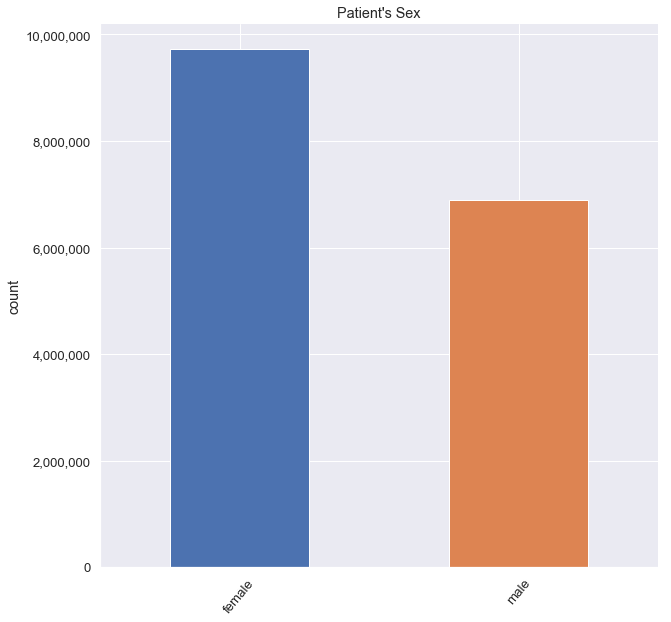

In [37]:
#Plot Patient's Sex - All Years/Total

count_plot(df = pat_charc_data_clean_1, col_name = 'sexo_names', title = "Patient's Sex")

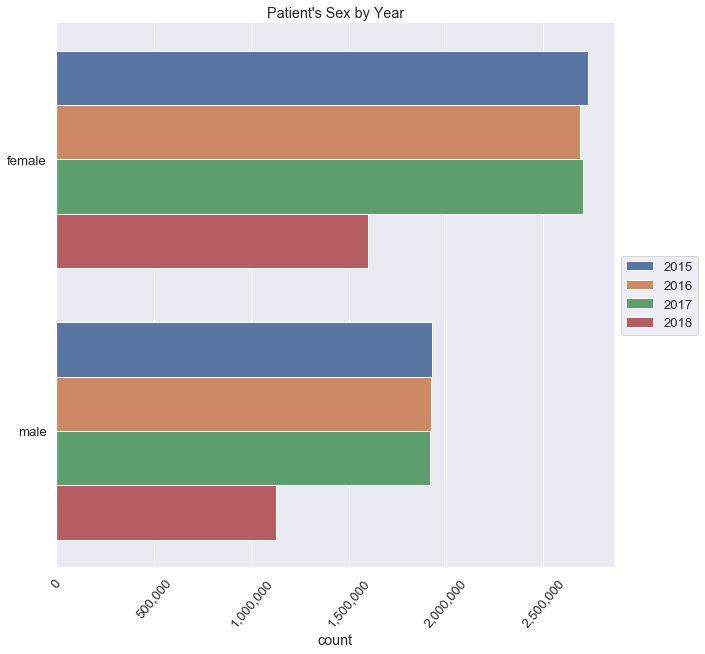

In [38]:
#Plot Patient's Sex - By Year

count_plot_hue(df = pat_charc_data_clean_1, col_name = 'sexo_names', 
               hue = 'ANO_CMPT',title = "Patient's Sex by Year")

> ### Part 2. Patient's Race

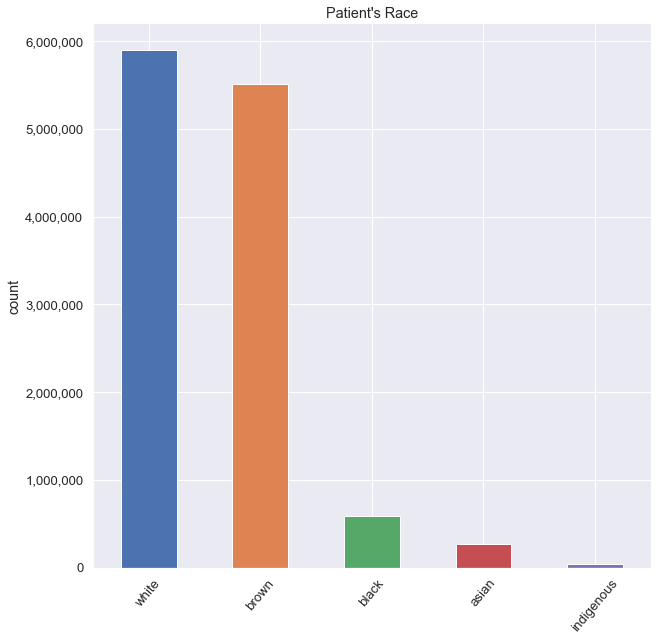

In [39]:
#Plot Patient's Race - All Years/Total

count_plot(df = pat_charc_data_clean_1, col_name = 'race_names', title = "Patient's Race")

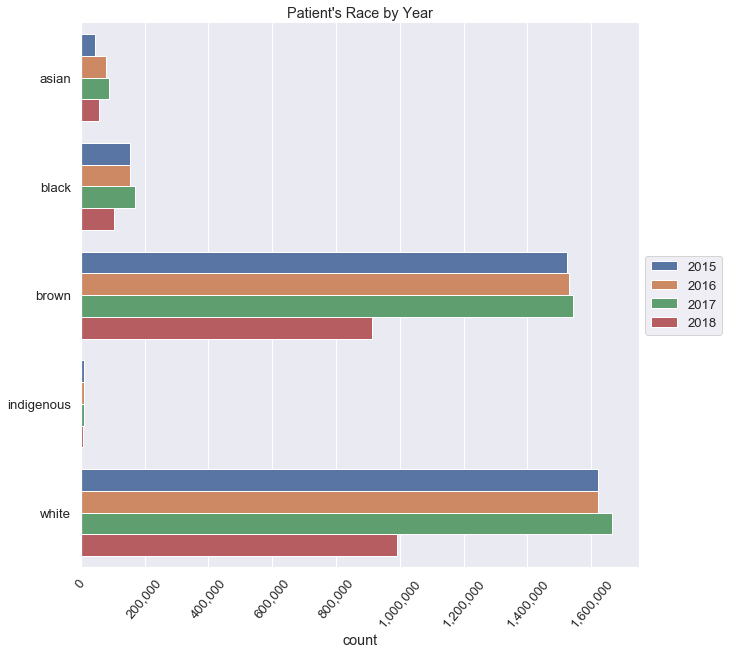

In [40]:
#Plot Patient's Race - By Year

count_plot_hue(df = pat_charc_data_clean_1, col_name = 'race_names', 
               hue = 'ANO_CMPT',title = "Patient's Race by Year")

> ### Part 3. Ethnicity

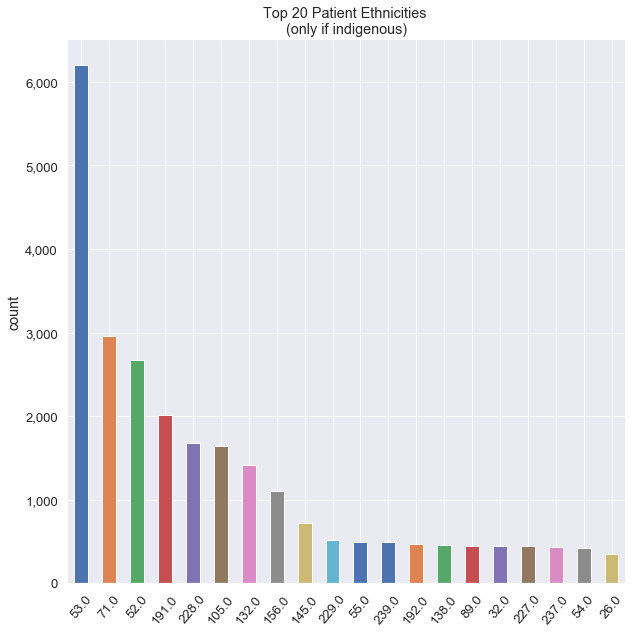

In [41]:
# Plot Top 20 ethnicities - All Years/Total

count_plot_slice(df = pat_charc_data_clean_1,
                 col_name = 'ETNIA_CAT', head = 20,
                 title = 'Top 20 Patient Ethnicities \n(only if indigenous)', 
                 xlabel = '', ylabel = 'count')

In [62]:
# Create counts of ethnicity and plot distribution

nat_count = pd.DataFrame(pat_charc_data_clean_1.ETNIA_CAT.value_counts()).reset_index()

nat_count_2015 = pd.DataFrame(pat_charc_data_clean_1_2015.ETNIA_CAT.value_counts()).reset_index()

nat_count_2016 = pd.DataFrame(pat_charc_data_clean_1_2016.ETNIA_CAT.value_counts()).reset_index()

nat_count_2017 = pd.DataFrame(pat_charc_data_clean_1_2017.ETNIA_CAT.value_counts()).reset_index()

nat_count_2018 = pd.DataFrame(pat_charc_data_clean_1_2018.ETNIA_CAT.value_counts()).reset_index()

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Log of Count')

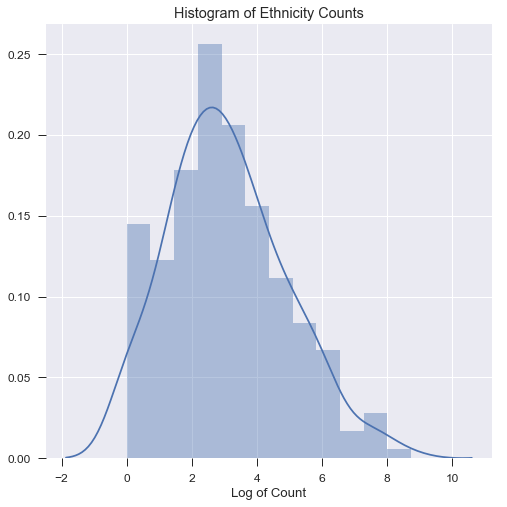

In [75]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(nat_count['ETNIA_CAT']))

plt.title("Histogram of Ethnicity Counts")

plt.xlabel('Log of Count')

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

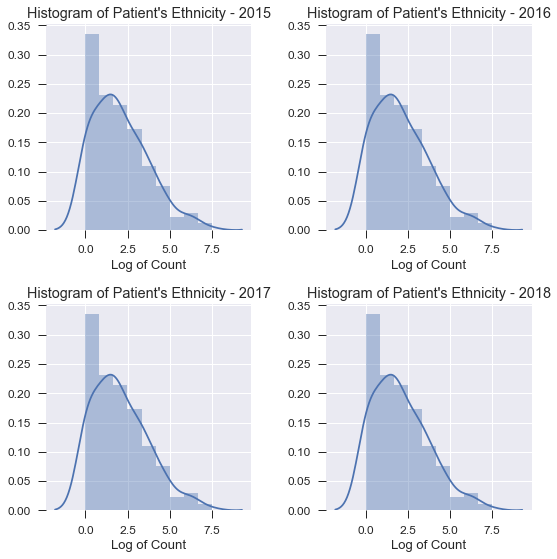

In [76]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(nat_count_2015['ETNIA_CAT']))

plt.title("Histogram of Patient's Ethnicity - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(nat_count_2015['ETNIA_CAT']))

plt.title("Histogram of Patient's Ethnicity - 2016")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(nat_count_2015['ETNIA_CAT']))

plt.title("Histogram of Patient's Ethnicity - 2017")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(nat_count_2015['ETNIA_CAT']))

plt.title("Histogram of Patient's Ethnicity - 2018")

plt.xlabel('Log of Count')

plt.tight_layout()

> ### Part 4. Patient's Municipality

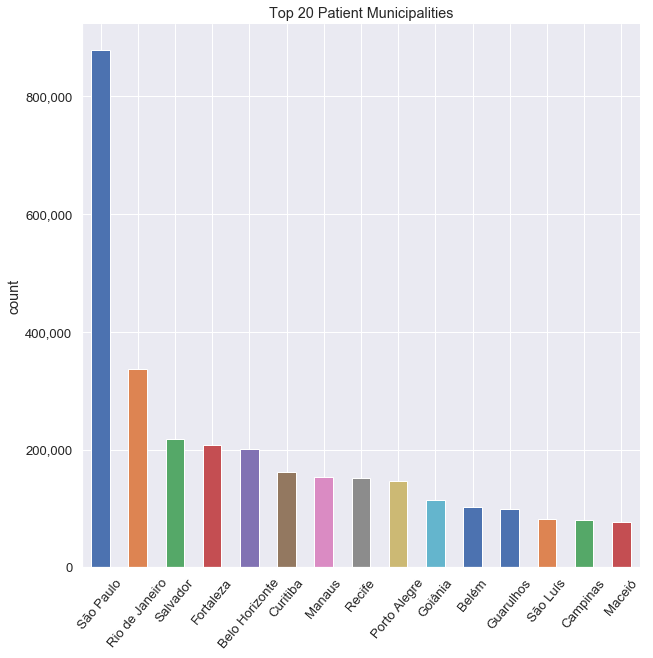

In [42]:
# Plot Top 20 municipalities - All Years/Total

count_plot_slice(df = pat_charc_data_clean_1,
                 col_name = 'MUNIC_RES_NAME', head = 15,
                 title = 'Top 20 Patient Municipalities', 
                 xlabel = '', ylabel = 'count')

In [69]:
# Create counts of nationality and plot distribution

#Filter dataframes by year

muni_count = pd.DataFrame(pat_charc_data_clean_1.MUNIC_RES_NAME.value_counts()).reset_index()

muni_count_2015 = pd.DataFrame(pat_charc_data_clean_1_2015.MUNIC_RES_NAME.value_counts()).reset_index()

muni_count_2016 = pd.DataFrame(pat_charc_data_clean_1_2016.MUNIC_RES_NAME.value_counts()).reset_index()

muni_count_2017 = pd.DataFrame(pat_charc_data_clean_1_2017.MUNIC_RES_NAME.value_counts()).reset_index()

muni_count_2018 = pd.DataFrame(pat_charc_data_clean_1_2018.MUNIC_RES_NAME.value_counts()).reset_index()

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Log of Count')

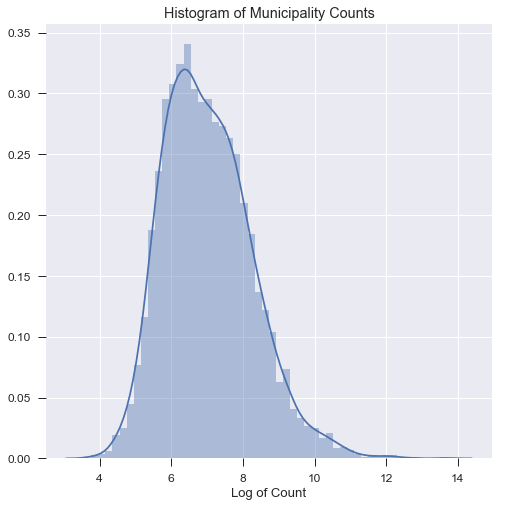

In [74]:
# Plot nationality variable - - All Years/Total

sns.distplot(np.log(muni_count['MUNIC_RES_NAME']))

plt.title("Histogram of Municipality Counts")

plt.xlabel('Log of Count')

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

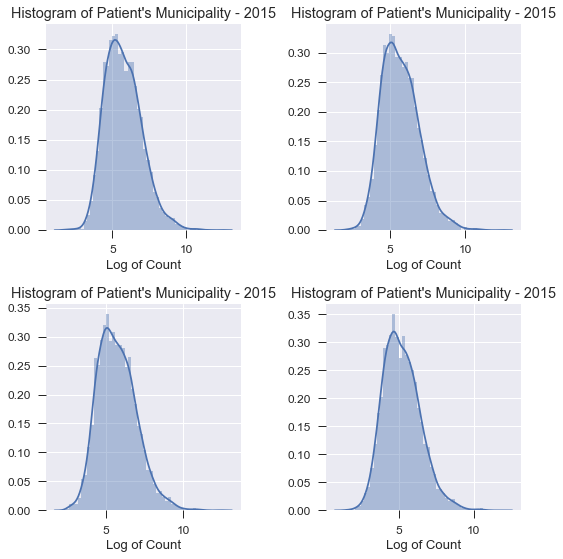

In [78]:
#Plot histograms for each year

plt.subplot(221)

sns.distplot(np.log(muni_count_2015['MUNIC_RES_NAME']))

plt.title("Histogram of Patient's Municipality - 2015")

plt.xlabel('Log of Count')

plt.subplot(222)

sns.distplot(np.log(muni_count_2016['MUNIC_RES_NAME']))

plt.title("Histogram of Patient's Municipality - 2015")

plt.xlabel('Log of Count')

plt.subplot(223)

sns.distplot(np.log(muni_count_2017['MUNIC_RES_NAME']))

plt.title("Histogram of Patient's Municipality - 2015")

plt.xlabel('Log of Count')

plt.subplot(224)

sns.distplot(np.log(muni_count_2018['MUNIC_RES_NAME']))

plt.title("Histogram of Patient's Municipality - 2015")

plt.xlabel('Log of Count')

plt.tight_layout()

> ### Part 5. Patient's Mortality Indicator

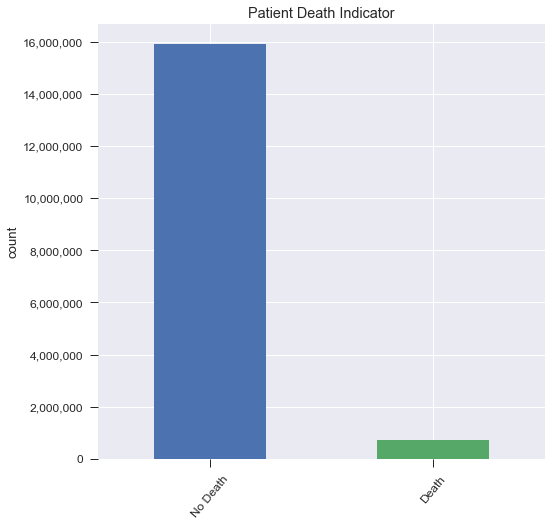

In [79]:
#Plot Patient's Mortality - All Years/Total

count_plot(df = pat_charc_data_clean_1, col_name = 'morte_name', title = "Patient Death Indicator")

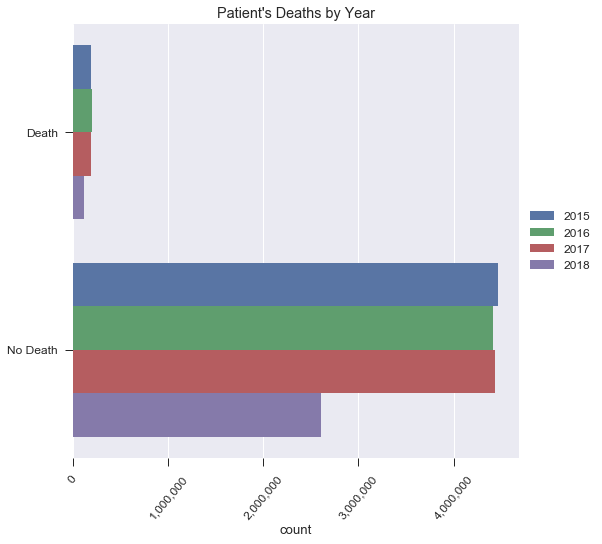

In [80]:
#Plot Patient's Death Indicator - By Year

count_plot_hue(df = pat_charc_data_clean_1, col_name = 'morte_name', 
               hue = 'ANO_CMPT',title = "Patient's Deaths by Year")

> ### Part 6. Patient's Age

Normalize Age

In [82]:
min_max_scaler = preprocessing.MinMaxScaler()
age_scaled = min_max_scaler.fit_transform(pat_charc_data_clean_1[['IDADE']])
df_age_norm = pd.DataFrame(age_scaled)

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


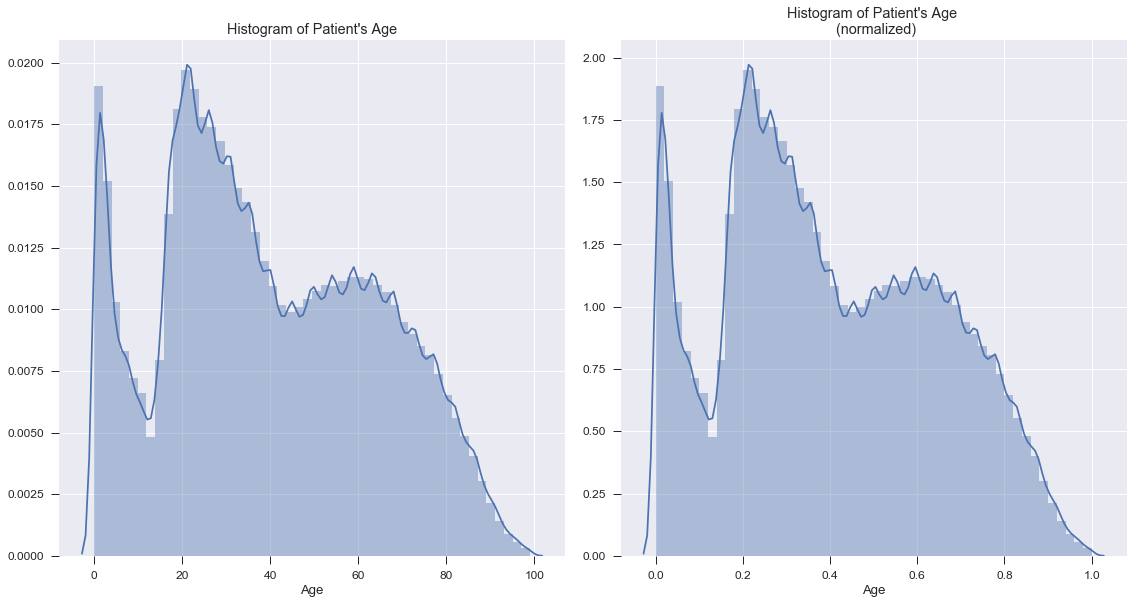

In [83]:
# Plot age variable - - All Years/Total

plt.subplot(221)

sns.distplot(pat_charc_data_clean_1['IDADE'])

plt.title("Histogram of Patient's Age")

plt.xlabel('Age')

plt.subplot(222)

sns.distplot(df_age_norm)

plt.title("Histogram of Patient's Age \n (normalized)")

plt.xlabel('Age')

plt.tight_layout(rect=[2, 2, 4, 4])

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwar

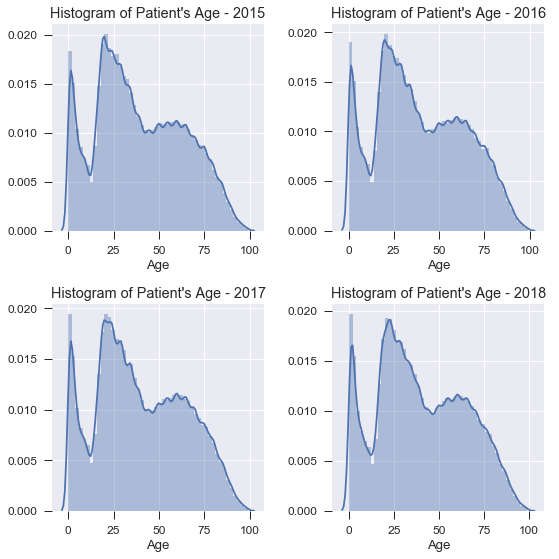

In [81]:
plt.subplot(221)

sns.distplot(pat_charc_data_clean_1_2015['IDADE'])

plt.title("Histogram of Patient's Age - 2015")

plt.xlabel('Age')

plt.subplot(222)

sns.distplot(pat_charc_data_clean_1_2016['IDADE'])

plt.title("Histogram of Patient's Age - 2016")

plt.xlabel('Age')

plt.subplot(223)

sns.distplot(pat_charc_data_clean_1_2017['IDADE'])

plt.title("Histogram of Patient's Age - 2017")

plt.xlabel('Age')

plt.subplot(224)

sns.distplot(pat_charc_data_clean_1_2018['IDADE'])

plt.title("Histogram of Patient's Age - 2018")

plt.xlabel('Age')

plt.tight_layout()

> `Normal Distribution Tests of the Age Variable`

In [84]:
norm_dist_tests(df = pat_charc_data_clean_1, col_name = 'IDADE')

D’Agostino and Pearson’s:  NormaltestResult(statistic=2876120.963198728, pvalue=0.0)
Anderson-Darling:  AndersonResult(statistic=143626.0897925906, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Distribution Statistics:  DescribeResult(nobs=16614830, minmax=(0, 99), mean=39.76610371577681, variance=583.1012038496913, skewness=0.2328908002697864, kurtosis=-0.9354451858374531)


> `Calculate & Plot Cumulative Distribution Functions of the Age Variable`

In [26]:
x, y = ecdf(pat_charc_data_clean_1['IDADE'])

x_theor, y_theor = theor_ecdf(df = pat_charc_data_clean_1, col_name = 'IDADE', seed = 42)

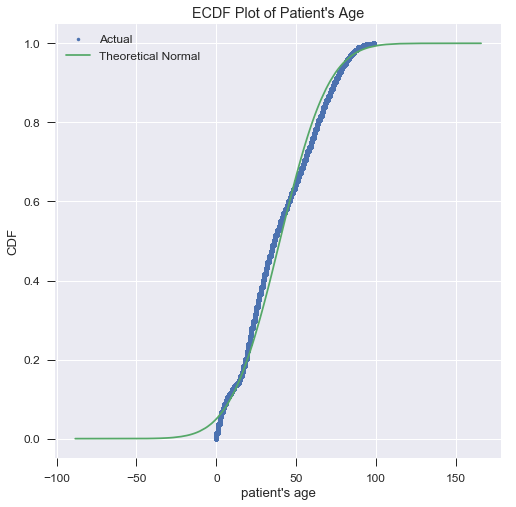

In [28]:
#Graph actual cumulative sample distribution

plt.plot(x, y, marker='.', linestyle='none', label = 'Actual')

plt.plot(x_theor, y_theor, label = 'Theoretical Normal')

plt.legend()

plt.title("ECDF Plot of Patient's Age")

plt.xlabel("patient's age")

plt.ylabel('CDF')

plt.show()

> `Create Bootstrap Replicates of Age Mean`

In [34]:
%%time

n_tries = 10000

age_mean_replicates = bs_sample(pat_charc_data_clean_1['IDADE'], np.mean, size = n_tries)

Wall time: 1h 19min 39s


C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


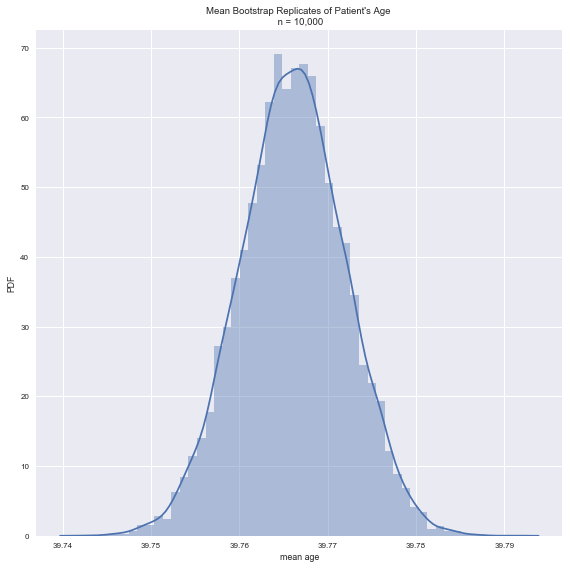

In [41]:
#Create Histogram of Bootstrap Mean Replicates

sns.distplot(age_mean_replicates, norm_hist=True)

plt.ylabel('PDF')

plt.xlabel('mean age')

plt.title("Mean Bootstrap Replicates of Patient's Age \n n = 10,000")

plt.tight_layout()

In [36]:
age_mean = np.mean(pat_charc_data_clean_1['IDADE'])

In [39]:
boot_conf_int(ci = [2.5,97.5], mean_rep = age_mean_replicates, 
              mean = age_mean)

Bootstrap Mean Replicates 95% CI:  [39.75436326 39.77757737]
P-value of patient age mean replicates:  0.4983


In [40]:
stats.ttest_1samp(pat_charc_data_clean_1.IDADE, age_mean)

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

> ### Part 7. Plot Heat Map of Demographics Features

In [29]:
patient_chara_corr = pat_charc_data_clean_1.corr()

Text(0.5,1,'Heat Map of Patient Characteristics')

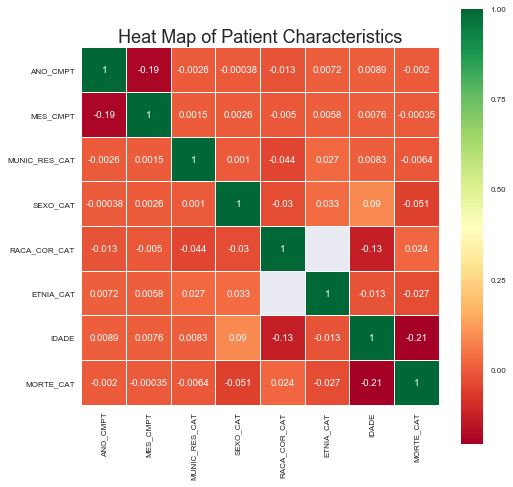

In [30]:
sns.set(font_scale=.8)

sns.heatmap(patient_chara_corr, square=True, linewidths=.05, annot=True, cmap='RdYlGn')

plt.title('Heat Map of Patient Characteristics', fontsize = 18)

> ### Part 8. Output Clean Demographic Data *(the numerical categorical values are the ones that will be used in the model)*

> **The numerical categorical values are the ones that will be used in the model**

In [31]:
pat_charc_data_clean_1.to_csv('AIH_sample_demo.csv', index = False, 
                              na_rep= 'NaN', encoding='utf-8', 
                              chunksize = 50000)

## End of Notebook